# EDA - Data Science Salaries 2023 💸
### This notebook is looking to identify patterns in data scientist salaries and determine what are the factors that lead to higher paying salaries

### Imports - Data reading

In [18]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')
pd.set_option('display.max_columns', 200)


In [2]:
df = pd.read_csv('./data/datascience_salaries.csv')

- Tiene 607 filas y 12 columnas 

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


🟣 **work_year:** The year in which the salary was paid<br>
🟣 **experience_level:** The experience level that the job was requiring<br>
🟣 **employment_type:** The way in which the employee was hired<br>
🟣 **job_title:** The job title<br>
🟣 **salary:** The total amount paid<br>
🟣 **salary_currency:** The currency in which the salary was paid<br>
🟣 **salary_in_usd:** The amount paid in USD<br>
🟣 **employee_residence:** The employee's place of residence during the work year (Country)<br>
🟣 **remote_ratio:** The rate between the full amount of work and do work donde remotly (0 -> No remote work or less than 20%, 50 -> Partially Remote, 100 -> Fully Remote)<br>
🟣 **company_location:** The country in which the company that is hiring is located<br>
🟣 **company_size:** Categorical value classifing the company by size (S -> Les than 50 employees, M -> 50 to 250 employees, L -> More than 250 employees)<br>

🔴 **None** of the columns have null value<br>
🔴 5 of the 12 columns are numeric **(41.6%)**<br>
🔴 7 of the 12 columns are string **(58.3%)**<br>
🔴 Dataset contains **607 rows**

### Initial understanding of numeric values

In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


- **work_year:**
  - The year range of the dataset is between 2020 and 2022
- **salary_in_usd:**
  - Salaries range from $2,859 USD and $600,000 USD
  - The average of the salaries paid in the dataset is $112,297 USD
- **remote_ratio**
  - It should be considerd as a categorical value with 3 posible values

### Initial understanding of string values

In [6]:
df.describe(include=['object'])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


- **experience_level**:
  - There are 4 unique values ("EN" -> Entry Level, "MI" -> Mid Level Junior, "SE" -> Intermediate / Senior Level, "EX" Expert Executive Level / Director)
  - The most frequent value is "SE"  **(280 -> 46%)**

- **employment_type**:
  - There are 4 unique values ("PT" -> Part Time, "FT" -> Full Time, "CT" -> Contract / Freelance)
  - The most frequent value is "FT" (Full Time)  **(588 -> 97%)**
  
- **job_title**:
  - There are 50 unique values
  - The most frequent value is "Data Scientist" **(143 -> 24%)**

- **salary_currency**:
  - There are 17 unique values
  - The most frequent value is "USD" **(398 -> 66%)**

- **employee_residence**:
  - There are 57 different locations of residence for employees in the dataset
  - The most frequent value is "US" **(332 -> 55%)**

- **company_location**:
  - There are 50 different company location 
  - The most frequent value is "US" **(355 -> 58%)**

- **company_size**:
  - There are 3 unique values (S, M ,L)
  -  The most frequent value is "M" (326 -> 54%)

### Data Preparation

#### We look for duplicate rows

In [7]:
df.loc[df.duplicated()]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


There are no duplicated values

#### Delete Columns with similar information or not relevant

In [8]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

salary_in_usd and salary have the same information, so we can delete salary.

In [9]:
df = df[['work_year', 'experience_level', 'employment_type',
       'job_title', 'salary_currency',
       #'salary', 
       'salary_in_usd',
       'employee_residence','remote_ratio', 'company_location',
       'company_size']].copy()

In [10]:
df.shape

(607, 10)

### Feature Understanding

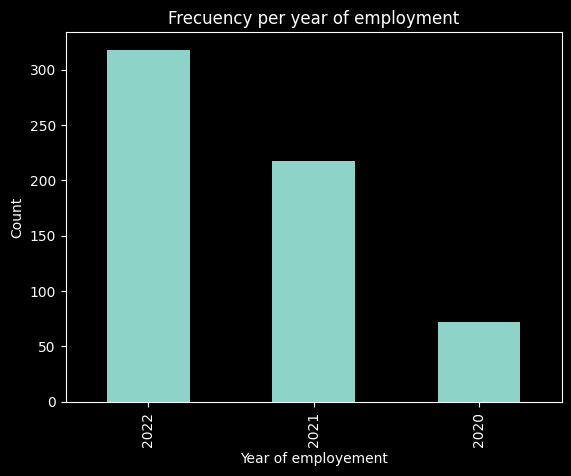

In [11]:
ax = df['work_year'].value_counts().head(10).plot(kind='bar',title='Frecuency per year of employment')
ax.set_xlabel('Year of employement')
ax.set_ylabel('Count')
plt.show()

- **Data is not evenly distributed**
- There are more rows for 2022 compared to 2021 and 2020

- IDEA:
  - Ajustar los salarios del 2021 y 2020 según la inflación para que queden en el 2022

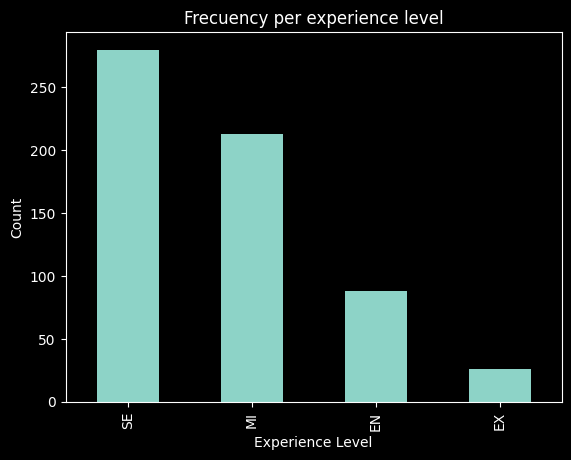

In [12]:
ax = df['experience_level'].value_counts().head(10).plot(kind='bar',title='Frecuency per experience level')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Count')
plt.show()

- There is more information about Senior level jobs compared to the other experience levels
- The experience level that less has information is Expert

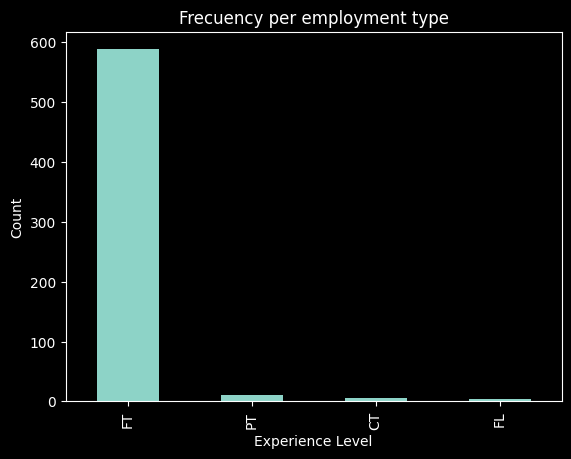

In [13]:
ax = df['employment_type'].value_counts().head(10).plot(kind='bar',title='Frecuency per employment type')
ax.set_xlabel('Experience Level')
ax.set_ylabel('Count')
plt.show()


- There is significantly more information about Full Time jobs compared to the other employment types

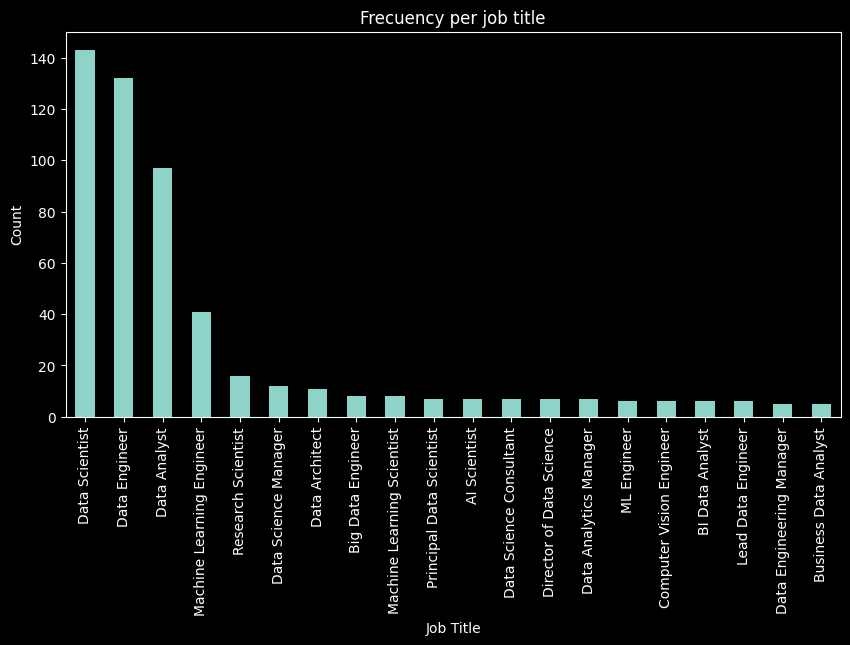

In [15]:
plt.figure(figsize=(10,5))
ax = df['job_title'].value_counts().head(20).plot(kind='bar',title='Frecuency per job title')
ax.set_xlabel('Job Title')
ax.set_ylabel('Count')
plt.show()



- The top 3 job titles with the most information are Data Scientist, Data Engineer, Data Analyst

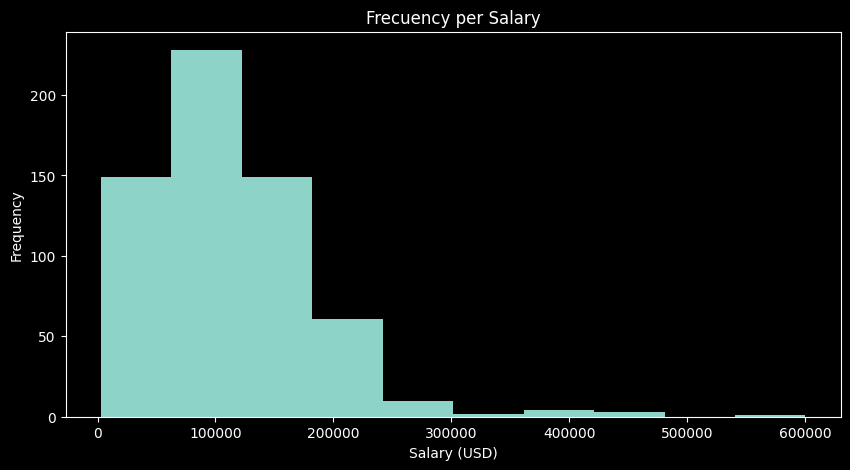

In [16]:
plt.figure(figsize=(10,5))
ax = df['salary_in_usd'].plot(kind='hist',title='Frecuency per Salary')
ax.set_xlabel('Salary (USD)')
plt.show()

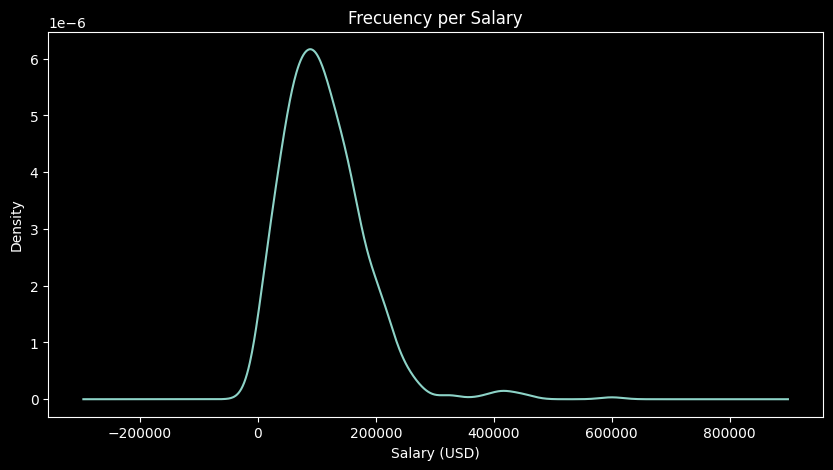

In [19]:
plt.figure(figsize=(10,5))
ax = df['salary_in_usd'].plot(kind='kde',title='Frecuency per Salary')
ax.set_xlabel('Salary (USD)')
plt.show()

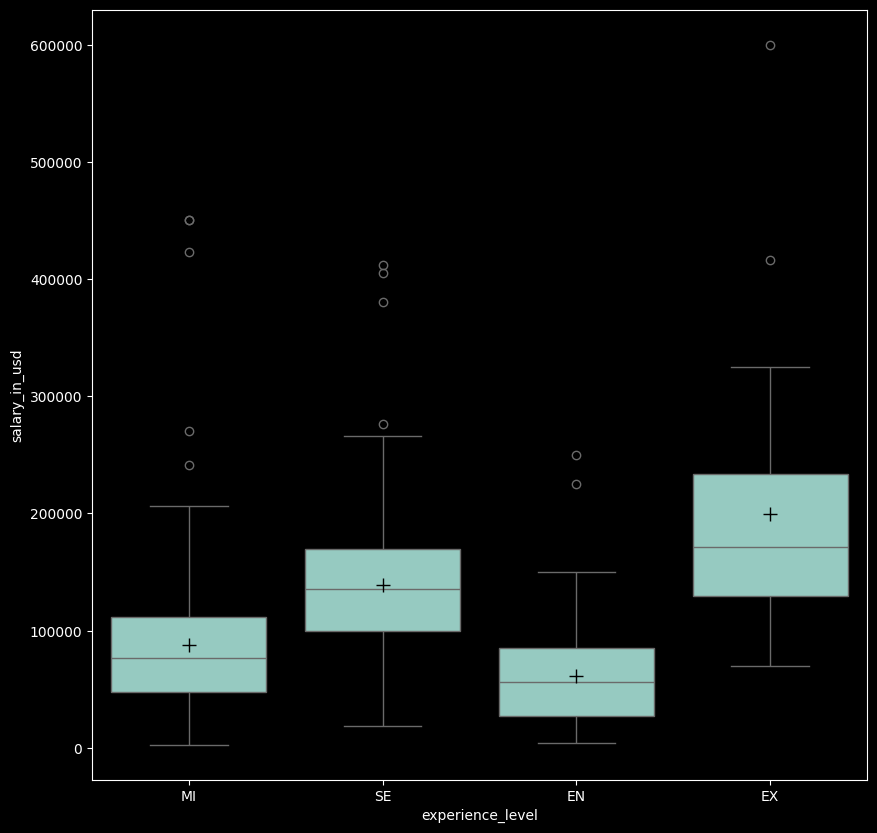

In [26]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='experience_level',y='salary_in_usd',data=df,showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

- We can observe that all Experience levels count with outliers in the data, however, MI and EX experience level has the largest outliers compared to the other levels
- For the expert/director experience level we can notice that the median is farest to the mean, indicating asymetrical distribution
- The interquartile range for the experience levels makes sense (Entry being the lowest paid and Expert being the highest paid)
- The are significant overlap between Entry and MID Junior Level as well as significant overlap between Senior and Expert Level

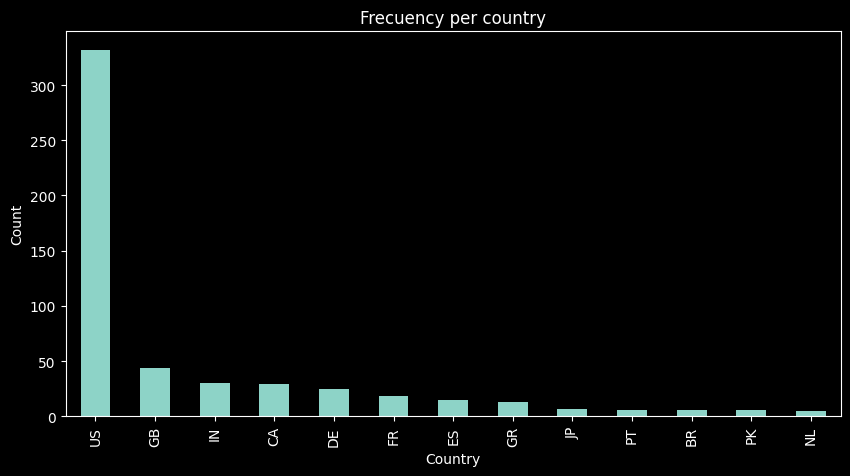

In [27]:
plt.figure(figsize=(10,5))
ax = df['employee_residence'].value_counts().head(13).plot(kind='bar',title='Frecuency per country')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.show()


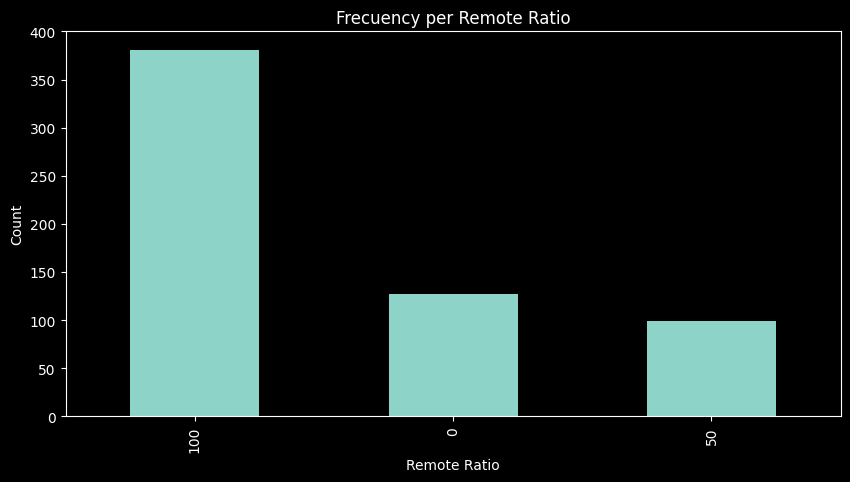

In [28]:
plt.figure(figsize=(10,5))
ax = df['remote_ratio'].value_counts().head(13).plot(kind='bar',title='Frecuency per Remote Ratio')
ax.set_xlabel('Remote Ratio')
ax.set_ylabel('Count')
plt.show()


- There is significantly more fully remote job information compared to the other remote levels.

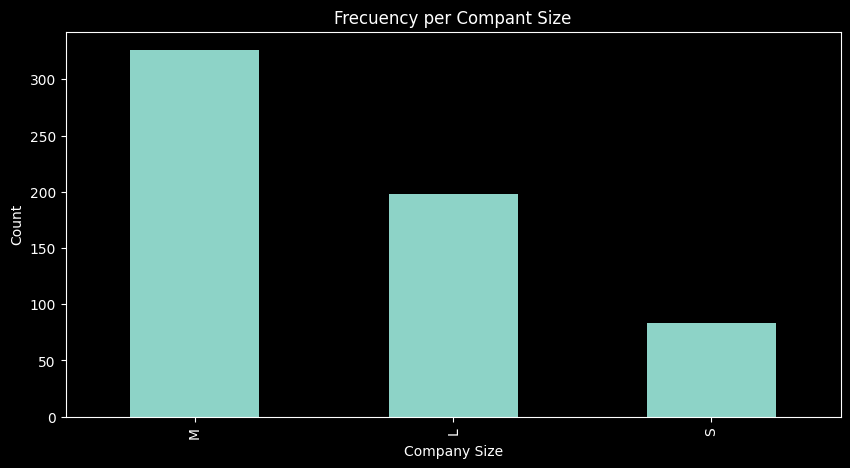

In [29]:
plt.figure(figsize=(10,5))
ax = df['company_size'].value_counts().head(13).plot(kind='bar',title='Frecuency per Compant Size')
ax.set_xlabel('Company Size')
ax.set_ylabel('Count')
plt.show()


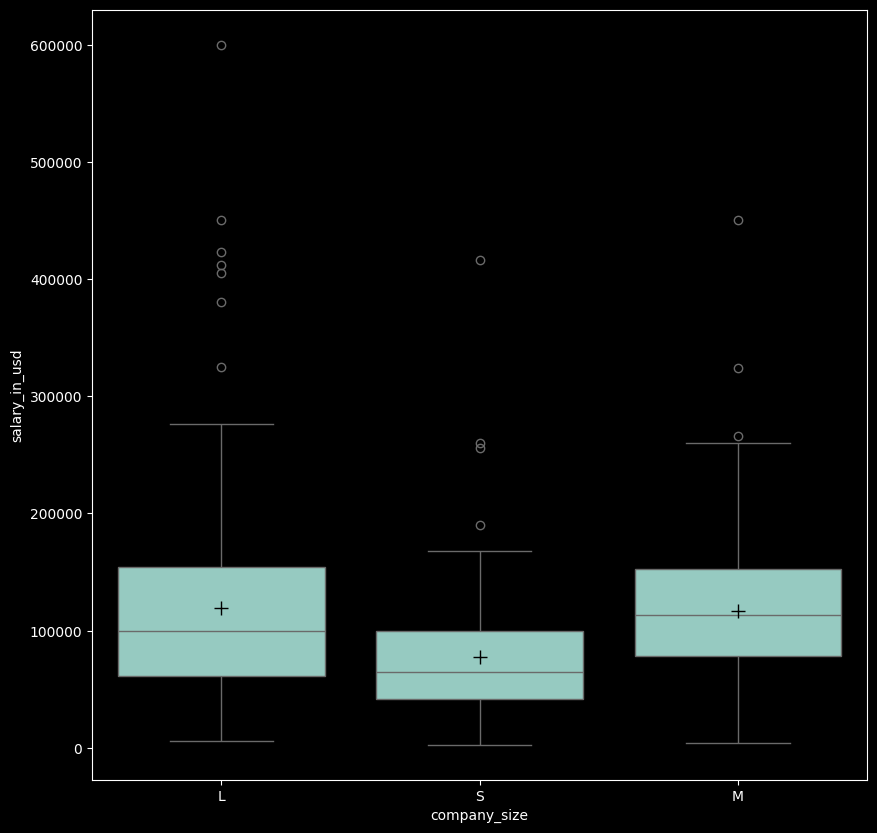

In [34]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='company_size',y='salary_in_usd',data=df,showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

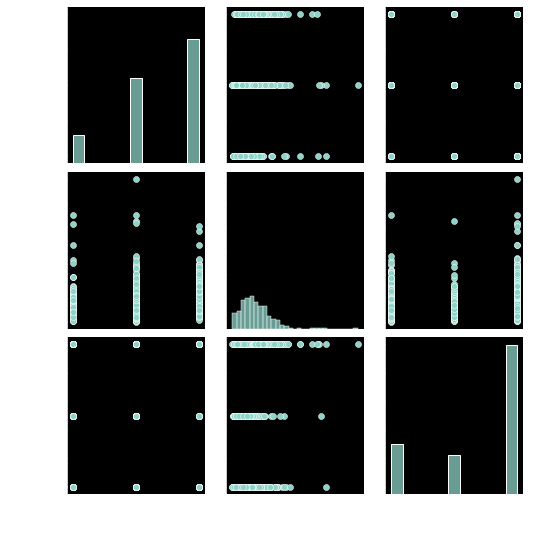

In [26]:
sns.pairplot(df)

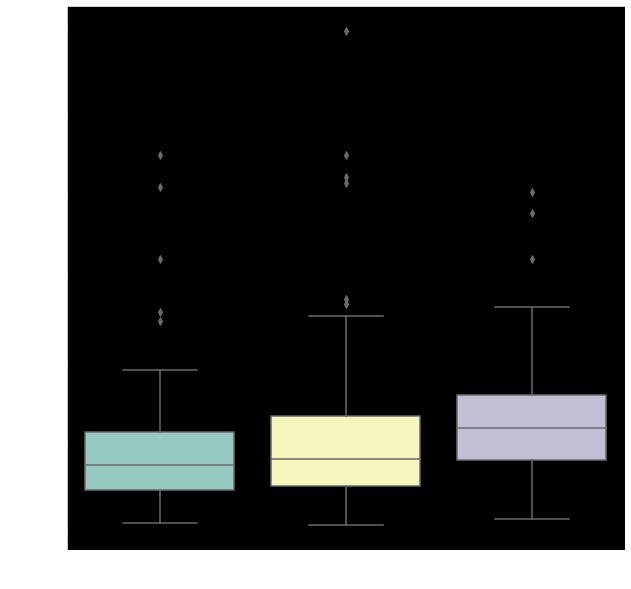

In [27]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='work_year',y='salary_in_usd',data=df)
plt.show()

In [28]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

- En el dataset el tamaño de la empresa no influye en el salario del empleado

In [32]:
df.query('salary_in_usd > 500000')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,US,100,US,L


In [33]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [34]:
df_corr = df[['work_year','salary_in_usd', 'remote_ratio']].dropna().corr()
df_corr

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


In [35]:
def mi_score(x,y):
    x = x.copy()
    # x.select_dtypes(['object','category']) -> Devuelve un subset de los datos unicamente con los tipos incluidos o excluidos
    for colname in x.select_dtypes(['object','category']):
        # Le asigna un valor numerico a una variable categorica
        x[colname], _ = x[colname].factorize()

    # Crea un arreglo de booleanos, indicando si la columna es tipo integer o no
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    # Mutual información nos indica la dependencia entre dos valores. Si es igual a cero significa que son variables independientes
    # En este caso se esta mirando el MI entre las columnas del df y el target value que es el price
    mi_score = mutual_info_regression(x,y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score', index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score
    
    #print(discrete_features)
    #print(x.dtypes)


x = df.copy()
y = x.pop('salary_in_usd')




In [36]:
mutual_info_Score = mi_score(x,y)
mutual_info_Score

employee_residence    0.483707
company_location      0.396244
experience_level      0.231845
job_title             0.201374
work_year             0.102819
company_size          0.052979
remote_ratio          0.046560
employment_type       0.015038
Name: Mutual Information Score, dtype: float64

Quiero convertir los valores categoricos a numericos:
- employee_residence: Tipo Nominal
- experience_level: Tipo Ordinal
- company_location: Tipo Nominal
- job_title: Tipo Nominal
- company_size: Tipo Ordinal
- employment_type: Tipo Nominal

Usamos labelEncoding technique para ordinal categoric values

Usamos HotEncoding technique para nominal categoric values

In [37]:
#assert False, 'breakpoint'

AssertionError: breakpoint

In [39]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [40]:
pd.get_dummies(df['employee_residence'])

,AE,AR,AT,AU,BE,BG,BO,BR,CA,CH,CL,CN,CO,CZ,DE,DK,DZ,EE,ES,FR,GB,GR,HK,HN,HR,HU,IE,IN,IQ,IR,IT,JE,JP,KE,LU,MD,MT,MX,MY,NG,NL,NZ,PH,PK,PL,PR,PT,RO,RS,RU,SG,SI,TN,TR,UA,US,VN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
le = LabelEncoder()
one = OneHotEncoder(sparse=False)
er_encoded = le.fit_transform(df['employee_residence'])
#df['employee_residence_encoded'] = er_encoded
er_encoded = er_encoded.reshape(len(er_encoded), -1)
trans_er = one.fit_transform(er_encoded)
df[one.categories_[0]] = trans_er.toarray()


"""
el_encoded = le.fit_transform(df['experience_level'])
df['experience_level_encoded'] = el_encoded

cl_encoded = le.fit_transform(df['company_location'])
df['company_location_encoded'] = cl_encoded

jt_encoded = le.fit_transform(df['job_title'])
df['job_title_encoded'] = jt_encoded

cs_encoded = le.fit_transform(df['company_size'])
df['company_size_encoded'] = cs_encoded

et_encoded = le.fit_transform(df['employment_type'])
df['employment_type_encoded'] = et_encoded
"""



AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
df.head()